In [4]:

import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# 데이터를 불러와 학습용, 테스트용 데이터로 분리하여 반환하는 함수입니다.
def load_data():
    
    X, y = load_wine(return_X_y = True)
    class_names = load_wine().target_names
    
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size =0.3, random_state=0)
    
    return train_X, test_X, train_y, test_y, class_names

# Confusion matrix 시각화를 위한 함수입니다.
def plot_confusion_matrix(cm, y_true, y_pred, classes, normalize=False, cmap=plt.cm.OrRd):
                          
    title = ""
    if normalize:
        title = 'Normalized confusion matrix'
    else:
        title = 'Confusion matrix'
    
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        # 정규화 할 때는 모든 값을 더해서 합이 1이 되도록 각 데이터를 스케일링 합니다.
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    print(title, ":\n", cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # label을 45도 회전해서 보여주도록 변경
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # confusion matrix 실제 값 뿌리기
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    


Confusion matrix :
 [[17  0  2]
 [ 1 20  1]
 [ 1  7  5]]
Normalized confusion matrix :
 [[0.89473684 0.         0.10526316]
 [0.04545455 0.90909091 0.04545455]
 [0.07692308 0.53846154 0.38461538]]


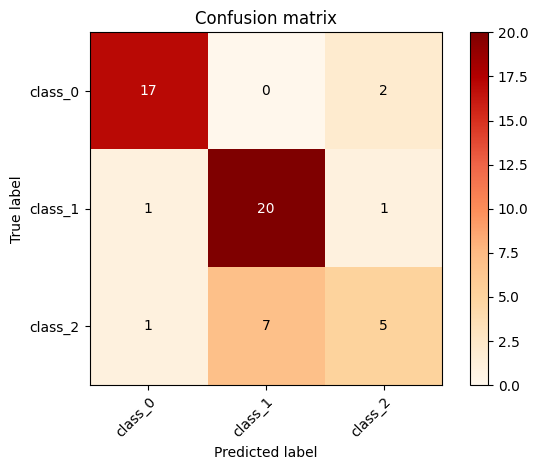

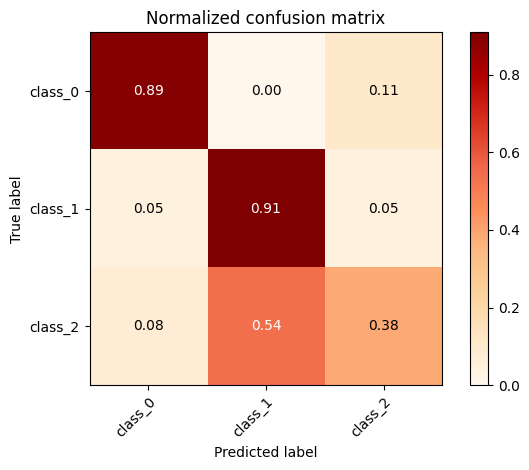

In [5]:

"""
1. 혼동 행렬을 계산하고, 
   시각화하기 위한 main() 함수를 완성합니다.
   
   Step01. 데이터를 불러옵니다.
   
   Step02. 분류 예측 결과를 평가하기 위한 혼동 행렬을 계산합니다.
   
   Step03. confusion matrix를 시각화하여 출력합니다.
           plot_confusion_matrix 함수의 인자를 참고하여 
           None을 채워보세요.
           
           3-1. 혼동 행렬 시각화 결과를 확인합니다. test_y와 y_pred를 비교합니다.
           3-2. 함수의 인자 normalize값을 True로 설정하여 
                정규화된 혼동 행렬 시각화 결과를 확인합니다.
           
"""
def main():
    
    train_X, test_X, train_y, test_y, class_names = load_data()
    
    # SVM 모델로 분류기를 생성하고 학습합니다.
    classifier = SVC()
    y_pred = classifier.fit(train_X, train_y).predict(test_X)
    
    cm = confusion_matrix(test_y, y_pred)
    
    plot_confusion_matrix(cm, test_y, y_pred, classes=class_names)
    
    # 정규화 된 혼동 행렬을 시각화합니다.
    plot_confusion_matrix(cm, test_y, y_pred, classes=class_names, normalize = True)
    
    return cm
    
if __name__ == "__main__":
    main()


IDE 제출 결과랑 값이 다르게 나오는데 왜일까?